### Bloco 1 - Aprendizado de Máquina

Como ponto de partida do trabalho de Aprendizado de Máquina, é essencial realizar uma coleta de informações em que os dados sejam coerentes, haja vista que a eficiência do algoritmo é dependente dessa coerência.

<br> Antes de falar sobre os dados propriamente ditos e partindo início de fato, precisamos falar qual o nosso projeto e qual o objetivo dele, informações essas que fornecem uma importante contextualização para pensarmos nos dados futuramente. 
<br> Em primeiro lugar, o objetivo do projeto "Análise da expressão gênica da derme, com ênfase em estudos forenses" é treinar uma máquina para que ela seja capaz de revelar a faixa etária na qual se encontra uma pessoa e qual o sexo de tal indivíduo, a partir da análise da expressão gênica de uma amostra de sua derme. A utilidade desse nosso trabalho se torna ainda mais pungente quando pensamos em situações nas quais é necessário identificar pessoas, mas o acesso a suas informações pessoais é extremamente dificultado ou até mesmo impossível.

<br> A base de dados que está sendo utilizada para a nossa coleta de dados é o "Genotype-Tissue Expression Portal (GTEx). Segundo a descrição dele em seu próprio site, o GTEx consiste em um projeto de longa data que visa construir recursos públicos para a compreensão da expressão gênica e sua regulação em diferentes tecidos humanos. Os dados estão disponibilizados abertamente em um domínio da internet (<https://gtexportal.org/home/>) e eles envolvem desde imagens até a transcrição de genes.

In [39]:
# Importando as bibliotecas que serão utilizadas para suprir as demandas das semanas iniciais do projeto (Bloco 01)
import numpy as np # numpy é uma biblioteca associada à álgebra linear
import pandas as pd # para trabalhar com dados
import seaborn as sns # também para trabalhar com gráficos
import matplotlib.pyplot as plt # para trabalhar com gráficos

# Importando os métodos/as funções das bibliotecas
from matplotlib.pyplot import figure
from pandas.api.types import is_numeric_dtype

<hr>

***Dataframe* inicial com os dados**

> Conceitos que são relevantes para compreender um DataFrame:
- O que é um DataFrame?
<br> **Resposta:** Em inglês, "data" possui o significado de "dados" e "frame" quer dizer "quadro, moldura". Nesse sentido, pensando puramente no significado dessas palavras, podemos dizer um DataFrame corresponde a uma organização dos dados trabalhados em uma estrutura similar à de uma tabela, de uma matriz, sendo também constituída por linhas e colunas e carregando em si diferentes informações.

- O que são features?
<br> **Resposta:** As features são caracterísitcas que assumem categoria de caráter de análise. Ou seja, elas corresponderão a colunas na nossa tabela.

> Entendendo um pouco mais sobre as nossas atividades em si:
- Quais são as nossas features?
<br> **Resposta:** As nossas features, pelo menos até o momento, são: genes, sexo e faixa etária.

In [40]:
# Aqui, vamos iniciar a manipulação dos dados
# Os dados estão armazenados em um arquivo csv nomeado "raw_data.csv"

data = pd.read_csv('raw_data.csv')
# pedimos que pandas leia os dados contidos no arquivo

In [41]:
data.shape # a resposta correspondente nos informará: número de linhas e depois número de colunas (mesma ordem de notações de matrizes)

(110, 56203)

In [42]:
data.head()
# O comando 'head' apresenta as cinco primeiras linhas do nosso DataFrame

,Amostra,Sexo,Idade,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,FAM138A,OR4G4P,OR4G11P,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
0,GTEX-U8XE,male,30-39,0.0,99380.0,0.0,0.0000,0.0000,0.0533,0.0000,...,172300000.0,25940.0000,0.0000,0.0000,45150000.0,83110000.0,369600.0,108200000.0,0.0000,19740.0
1,GTEX-UPJH,male,50-59,0.0,100900.0,0.0,0.0559,0.0000,0.0576,0.1029,...,279700000.0,0.0000,0.8199,0.0000,60520000.0,58190000.0,673000.0,151400000.0,0.7330,14230.0
2,GTEX-UPK5,male,40-49,0.0,37340.0,0.0,0.0000,0.0468,0.0678,0.0606,...,348300000.0,0.8260,0.9660,0.8028,45560000.0,92720000.0,528700.0,240900000.0,0.8636,33530.0
3,GTEX-V1D1,male,50-59,0.0,107000.0,0.0,0.0997,0.0708,0.1028,0.0459,...,411200000.0,0.0000,14640.0000,0.0000,124900000.0,165500000.0,557000.0,275900000.0,0.6543,31750.0
4,GTEX-VJYA,male,60-69,0.0,79100.0,0.0,0.0505,0.0000,0.0000,0.0466,...,394100000.0,0.6343,0.0000,0.0000,103900000.0,150400000.0,697800.0,243100000.0,0.6632,32180.0


<hr>

**Dados categóricos**

- O que é um dado categórico?
<br> **Resposta:** Os dados podem ser categóricos e numéricos. Dados numéricos são quantitativos e transmitem a ideia de magnitude dos dados de uma categoria. Os dados categóricos, por sua vez, não tratam de valores, mas sim de categorias no quais se encaixam os dados analisados dentro daquela variável.

In [43]:
# Início do tratamento de dados
# Definição de uma função que tem como objeto o intervalo das idades das amostras (faixas etárias)
def coluna_categorica(intervalo):
    dic = {'20-29':'Jovem', # criação de um dicionário que estabelece a correspondência entre a faixa etária numérica e uma categoria nominal
           '30-39':'Jovem',
           '40-49':'Adulto',
           '50-59':'Adulto',
           '60-69':'Idoso',
           '70-79':'Idoso'}
    
    return dic[intervalo]
# ao ser chamada, a função retornará a categoria definida a partir do intervalo solicitado e sua correspondência no dicionário

In [44]:
data['Categoria Idade'] = (data['Idade'].apply(coluna_categorica))
# dentro de todos os dados trabalhados, a 'Categoria Idade' vai corresponder à coluna idade da tabela original
# mas agora submetida à função 'coluna_categorica'
# portanto, a 'Categoria Idade' vai corresponder a 'Jovem', 'Adulto' e 'Idoso' e não aos intervalos de idade
# importante pontuar que os valores de idade ainda estarão aparecendo no DataFrame, 'Categoria Idade' será uma coluna a mais

# o método '.astype' "enables us to set or convert the data type of an existing data column in a dataset or a data frame"
# fonte: <https://www.askpython.com/python/built-in-methods/python-astype>
data = data.astype({"Sexo":'category', "Idade":'category', "Categoria Idade": 'category'})
# chamamos 'data' novamente para que a nova alteração seja sobreposta à DataFrame original

Nesse ponto, asseguramos que as nossas features categóricas realmente sejam compreendidas como categorias. Essa linha foi necessária porque, em testes anteriores, essas variáveis categóricas estavam sendo classificadas como objeto (não que 'object'estivesse totalmente errado, mas eles podem ser várias coisas e tinhamos a oportunidade de sermos mais específicos.

In [45]:
# quando criamos uma nova coluna no DataFrame, ela vai para o final
# queríamos trazê-la para frente

# criação de uma variável 
cols = list(data.columns.values)
# atribuindo à variável 'cols' os elementos de uma lista que correspondem às colunas do nosso DataFrame

# alterações organizadas dos dados que de fato visualizaremos:
col = cols[-1:]
# atribuimos o último elemento da lista a qual corresponde variável anterior
cols.pop(-1)
# tiramos o último elemento da lista (a nova coluna)
cols.insert(3,col[0])
# inserimos os dados na ordem desejada
data = data[cols]
# registrando as alterações no DataFrame

<hr>

**Tipos de dados no *dataframe***

In [46]:
(data.dtypes).value_counts()
# solicitamos ao pandas que ele forneça o tipo dos nossos dados
# mais do que isso, pedimos que ele conte quantas vezes essa categoria aparece no DataFrame (quantas vezes um dado desse tipo se repete)

float64     56200
object          1
category        1
category        1
category        1
dtype: int64

- Recebemos três tipos de dados:
> **'float64'**: indica que os dados assumem valores numéricos com casas decimais e eles guardam 64bits na memória;
> **<br>'object'**: é uma categoria mais geral, que engloba muitas possibilidades de dados; 
> **<br>'category'**: indica que os dados analisados correspondem a dados categóricos;

Portanto, o que obtemos é o seguinte:
<br> **float64**: a esse tipo de dado correspondem os valores das nossas expressões gênicas;
<br> **object**: a esse tipo de dado correspondem os genes;
<br> **category**: a esse tipo de dado correspondem: idade, categoria de idade e sexo;

<hr>

**Normalização dos dados**
<br> O processo de normalizar dados consiste basicamente em submeter os dados de colunas diferentes do nosso DataFrame a uma escala distinta da que eles assumem para que possamos analisá-los com maior facilidade. A normalização não ocasiona qualquer alteração no significado dos dados ou nas informações que eles carregam, apenas facilita a análise dos mesmos. No nosso caso, estamos trabalhando com valores muito grandes, então normalizalos na escala de 1 foi uma boa opção. 

In [47]:
for index in data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(data[index][0]): # retomando uma função do pandas
        data[index] = data[index]/max(data[index])

In [48]:
data.head()
# novamente, nos fornece as 5 primeiras linhas do DataFrame
# agora, os dados estão normalizados

,Amostra,Sexo,Idade,Categoria Idade,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,FAM138A,OR4G4P,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
0,GTEX-U8XE,male,30-39,Jovem,0.0,0.687751,0.0,0.000000,0.000000,0.228755,...,0.325463,0.075605,0.000000,0.000000e+00,0.216443,0.283362,0.175749,0.308702,0.000000,0.076216
1,GTEX-UPJH,male,50-59,Adulto,0.0,0.698270,0.0,0.271623,0.000000,0.247210,...,0.528334,0.000000,0.000003,0.000000e+00,0.290125,0.198398,0.320019,0.431954,0.000004,0.054942
2,GTEX-UPK5,male,40-49,Adulto,0.0,0.258408,0.0,0.000000,0.326816,0.290987,...,0.657915,0.000002,0.000004,3.672461e-07,0.218408,0.316127,0.251403,0.687304,0.000005,0.129459
3,GTEX-V1D1,male,50-59,Adulto,0.0,0.740484,0.0,0.484451,0.494413,0.441202,...,0.776728,0.000000,0.058630,0.000000e+00,0.598754,0.564269,0.264860,0.787161,0.000003,0.122587
4,GTEX-VJYA,male,60-69,Idoso,0.0,0.547405,0.0,0.245384,0.000000,0.000000,...,0.744428,0.000002,0.000000,0.000000e+00,0.498082,0.512786,0.331812,0.693581,0.000003,0.124247


<hr>

### Análise exploratória dos dados

É importante salientar a escolha dos gráficos mostrados a seguir, isto é, a opção por gráficos de barros a gráficos do tipo pizza já que no livro Storytelling com dados, de Cole Nussbaumer Knaflic, a autora demonstra como temos uma grande dificuldade na identificação de ângulos, ao passo de que temos uma facilidade maior de observar a diferença em comprimentos. Dessa forma, faz com que a demonstração dos dados seja mais eficaz.

Abaixo teremos 5 gráficos;
- No primeiro gráfico teremos uma representação das amostras divididas pelas faixas etárias;
- No segundo gráfico teremos uma representação de uma divisão das amostra por sexo;
- No terceiro gráfico teremos uma representação do TPM dos genes de interesse por 30 amostras aleatorias;
- No quarto gráfico teremos uma representação da variação do TPM dos genes de interesse pelas faixas etárias;
- No quinto gráfico teremos uma representação da matriz de covariância em um mapa de calor.

**1. Distribuição das idades**

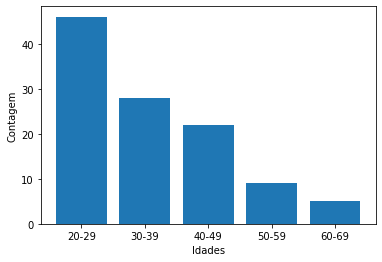

In [49]:
# plotando um gráfico de barras que relaciona o número de amostras e quantas amostras correspondem a cada faixa etária
plt.bar(data['Idade'].unique().sort_values(),data['Idade'].value_counts())
plt.xlabel('Idades')
plt.ylabel('Contagem')
plt.show()

**Análise**
<br> Temos um total de 110 amostras. A partir dos dados que estamos analisando agora, percebemos que a faixa etária a qual os dados obtidos dessas amostras são mais frequentemente associados é a de 20 a 29 anos. Além disso, conforme o aumento das faixas etárias, observamos uma diminuição do número de doadores.

**Perguntas pensadas a partir do gráfico que podem ser respondidas futuramente:**
<br> A. Será que a idade influencia no "Transcritos Por Milhão" (TPM) dos nossos genes?
> Hipótese: Até o momento, acreditamos que sim. Afinal, é o que indica a literatura e é a hipótese que motivou esse trabalho.

**2. Distribuição do sexo**

- Analisar gráfico sexo

- Será que o sexo influência no TPM dos genes?

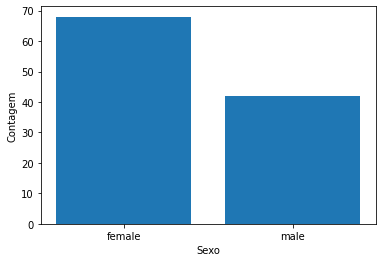

In [50]:
# plotando um gráfico de barras que relaciona o número de amostras e quantas amostras correspondem a sexo (masculino e feminino)
plt.bar(data['Sexo'].unique().sort_values(),data['Sexo'].value_counts())
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

**Análise**
<br> Temos um total de 110 amostras. A partir dos dados que estamos analisando agora, percebemos que os dados aqui trabalhados são mais provenientes de doadoras do sexo feminino. Sendo que elas representam mais de 50% dos doadores. 

**Perguntas pensadas a partir do gráfico que podem ser respondidas futuramente:**
<br> A. Será que o sexo influencia no "Transcritos Por Milhão" (TPM) dos genes?
> Hipótese: Com base puramente na análise do gráfico, nos parece que sim. Todavia, a diferença entre os dois dados também não aprece ser muito gritante a ponto de nos fornecer uma certeza.

**3. Escolhas dos genes**

- Escolher os 20 genes com os maiores valores de TPM (Transcrições por milhão)

In [51]:
genes = {} # criação de um dicionário
for col in data.iloc[:,4:]: # retomando a variável criada anteriormente
    genes.update({col:data[col].sum()}) 

In [52]:
genes_ordenados = {k: v for k, v in sorted(genes.items(), key=lambda item: item[1])}

In [53]:
genes_interesse = list(genes_ordenados)[-20:]

- Criação de um novo *dataframe* com os genes de interesse

In [54]:
data_c = data.copy() # não alteramos o DataFrame inicial e criamos um outro

In [55]:
genes_interesse.insert(0,'Amostra')
genes_interesse.insert(1,'Sexo')
genes_interesse.insert(2,'Categoria Idade')
genes_interesse.insert(3,'Idade')

In [56]:
data_c = data_c[genes_interesse]

In [57]:
data_c.head()

,Amostra,Sexo,Categoria Idade,Idade,URM1,TRAPPC3,GTF3C5,USP4,SCYL1,MLF2,...,RTFDC1,MTMR14,MANBAL,MRPL9,GPS1,GTF2F1,SMPD4,NRBP1,DNAJB12,SUPT5H
0,GTEX-U8XE,male,Jovem,30-39,0.970511,0.916667,0.706498,0.825296,0.943988,0.915365,...,0.810352,0.620929,0.731743,0.965841,0.830299,0.712460,0.889464,0.847246,0.717243,0.864087
1,GTEX-UPJH,male,Adulto,50-59,0.668665,0.724498,0.855626,1.000000,0.814403,0.777995,...,0.843942,1.000000,0.821252,0.669403,0.862361,0.765743,0.917921,1.000000,0.882019,0.871705
2,GTEX-UPK5,male,Adulto,40-49,0.765044,0.891566,0.641997,0.779974,0.665592,0.738281,...,0.869037,0.802774,0.980705,0.990600,0.564181,0.765877,0.690263,0.776425,0.791548,0.700210
3,GTEX-V1D1,male,Adulto,50-59,0.695756,0.547992,0.632330,0.924374,0.575239,0.707031,...,0.592602,0.774729,0.699183,0.706209,0.623605,0.516550,0.806444,0.662126,0.736812,0.725469
4,GTEX-VJYA,male,Idoso,60-69,0.574682,0.795382,0.503962,0.911989,0.711825,0.703125,...,0.743955,0.808203,0.802090,0.998014,0.601762,0.598762,0.782455,0.696135,0.595576,0.682169


In [58]:
data_c.describe()

,URM1,TRAPPC3,GTF3C5,USP4,SCYL1,MLF2,DGCR14,ARAF,TCF25,HDAC3,RTFDC1,MTMR14,MANBAL,MRPL9,GPS1,GTF2F1,SMPD4,NRBP1,DNAJB12,SUPT5H
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,0.740378,0.741143,0.741570,0.741811,0.744710,0.745325,0.747058,0.747542,0.752392,0.753104,0.753310,0.756226,0.757714,0.759202,0.762487,0.763749,0.763904,0.772946,0.774207,0.777605
std,0.120727,0.112429,0.116186,0.110898,0.101850,0.100064,0.125287,0.081897,0.095828,0.120463,0.099728,0.118397,0.107952,0.115778,0.108884,0.106008,0.107253,0.098455,0.101740,0.095773
min,0.489811,0.475100,0.503962,0.464822,0.457546,0.472852,0.462563,0.544515,0.529223,0.419220,0.534048,0.491858,0.514538,0.487091,0.540575,0.516550,0.511054,0.497101,0.499433,0.513281
25%,0.652002,0.677309,0.654477,0.667194,0.690153,0.669434,0.647221,0.698349,0.688618,0.679805,0.675794,0.681393,0.687726,0.694525,0.686230,0.699576,0.685442,0.699855,0.705828,0.708229
50%,0.733517,0.748896,0.724643,0.750066,0.735497,0.736003,0.742306,0.749807,0.748932,0.761465,0.768919,0.754825,0.756867,0.767311,0.758368,0.765810,0.759760,0.773768,0.773539,0.774381
75%,0.819588,0.804317,0.819532,0.818379,0.802901,0.813639,0.844511,0.797562,0.811983,0.826594,0.833845,0.831197,0.832909,0.827717,0.836171,0.830631,0.847778,0.845580,0.842102,0.851734
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Perguntas pensadas a partir da escolha dos 20 genes mais frequentes e que podem ser respondidas futuramente:**
A. Existe algum comportamento fiel ou infiel aos dados da literatura?
> Para respondê-la, precisaremos continuar lendo artigos e analisando quais genes são mencionados com maior frequência na literatura. Posteriormente, podemos voltar aqui e comparar.

B. As taxas de variação fazem sentido considerando o comportamento dos genes na literatura?
> Precisamos também continuar estudando a literatura.

C. Existe alguma relação entre os TPMs dos genes?
> A matriz de covariância poderá nos ajudar a responde isso e ela será encontrada mais para baixo.

*Heatmap* dos 20 genes:

In [59]:
plot_df = data_c.iloc[:30,4:]

# Selecionando 30 dados das amostras dentre as disponíveis (de forma "arbitrária", sem uma análise anterior)

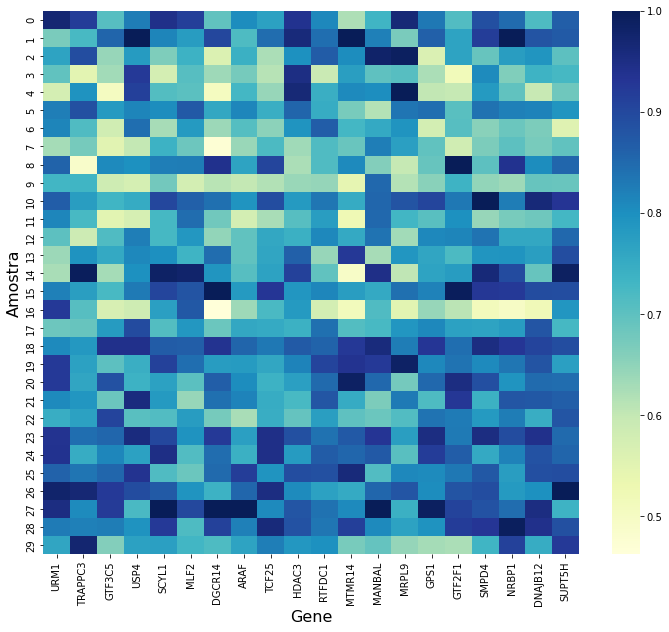

In [60]:
figure(figsize=(12, 10))
# Configuração das dimensões da imagem do gráfico a ser gerado

sns.heatmap(plot_df,cmap="YlGnBu")
# Plotagem do heatmap e seleção das cores a serem utilizadas pelo gráfico

plt.xlabel('Gene',fontsize=16)
plt.ylabel('Amostra',fontsize=16)
# Determinação das legendas

plt.show()
[13:52] Artur Hosoi Kimura
figure(figsize=(12, 10))
# Configuração das dimensões da imagem do gráfico a ser gerado

sns.heatmap(plot_df,cmap="YlGnBu")
# Plotagem do heatmap e seleção das cores a serem utilizadas pelo gráfico

plt.xlabel('Gene',fontsize=16)
plt.ylabel('Amostra',fontsize=16)
# Determinação das legendas

plt.show()
# Responsável por mostrar o gráfico visualmente

> A imagem acima dispõe o gráfico *Heatmap* de 30 amostras diferentes em relação à expressão relativa aos 20 genes de interesse selecionados em primeira instância, nos quais os dados numéricos são dados em TPM normalizados. De tal modo, quanto mais escuro em coloração for um quadrado, mais elevada será a expressão gênica em uma dada amostra em relação ao gene comparado. O que nos permite analisar os genes que são expressos em maior intensidade e maior frequência em um conjunto de amostras.

*Boxplot* dos genes em função das idades:

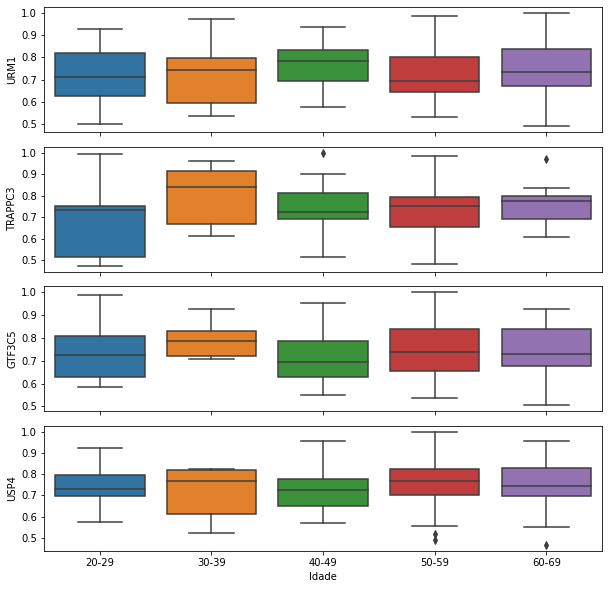

In [61]:
fig = plt.figure()
fig.set_size_inches(10,10)

i = 4

ax1 = fig.add_subplot(411)
sns.boxplot( x = "Idade", y = data_c.iloc[:,i],data = data_c)
ax1.set_xlabel('')
ax1.set_xticklabels([])

i += 1

ax2 = fig.add_subplot(412)
sns.boxplot( x = "Idade", y = data_c.iloc[:,i],data = data_c)
ax2.set_xlabel('')
ax2.set_xticklabels([])

i += 1

ax3 = fig.add_subplot(413)
sns.boxplot( x = "Idade", y = data_c.iloc[:,i],data = data_c)
ax3.set_xlabel('')
ax3.set_xticklabels([])

i += 1

ax4 = fig.add_subplot(414)
sns.boxplot( x = "Idade", y = data_c.iloc[:,i],data = data_c)
ax4.set_xlabel('Idade')
#ax4.set_xticklabels([])

plt.subplots_adjust(wspace=0.25,hspace=0.12)

plt.show()

> A imagem acima retrata o gráfico Boxplot de quatro dos vinte genes de interesse selecionados para um primeiro teste em relação às cinco faixas etárias nas quais os doadores das amostras se encaixavam. De tal forma, as linhas das extremidades superior e inferior relatam o valor máximo e mínimo de expressão gênica dada em TPM (Transcritos Por Milhão), respectivamente; enquanto os limites superiores e inferiores de cada caixa representam o terceiro e primeiro quartil, respectivamente; e a linha do meio se refere ao segundo quartil, ou seja, a mediana (todos os dados numéricos dados em relação à expressão gênica dada por TPM).

*Plot* da matriz de covariância:

,URM1,TRAPPC3,GTF3C5,USP4,SCYL1,MLF2,DGCR14,ARAF,TCF25,HDAC3,RTFDC1,MTMR14,MANBAL,MRPL9,GPS1,GTF2F1,SMPD4,NRBP1,DNAJB12,SUPT5H
URM1,0.014575,0.004885,0.004945,0.002629,0.006427,0.003911,0.005180,0.004161,0.004466,0.005121,0.006500,0.004653,0.007064,0.003597,0.006005,0.005495,0.004605,0.003663,0.004828,0.002990
TRAPPC3,0.004885,0.012640,0.003596,0.004087,0.002882,0.002855,0.002505,0.003553,0.001937,0.007855,0.003013,0.001472,0.003207,0.006537,0.002367,0.000114,0.002893,0.004279,0.003189,0.002932
GTF3C5,0.004945,0.003596,0.013499,0.004308,0.002213,0.000978,0.007353,0.005001,0.005198,0.005468,0.000606,0.006167,0.000505,0.002719,0.008160,0.001789,0.006065,0.003832,0.004961,0.005729
USP4,0.002629,0.004087,0.004308,0.012298,0.002818,0.002813,0.002309,0.003256,0.004315,0.006193,0.004425,0.003668,0.001024,0.004161,0.001913,0.002445,0.005338,0.005662,0.004366,0.004649
SCYL1,0.006427,0.002882,0.002213,0.002818,0.010373,0.004152,0.006834,0.003715,0.006438,0.003860,0.004511,0.004277,0.005680,0.002025,0.006064,0.006072,0.006770,0.005636,0.005693,0.005454
MLF2,0.003911,0.002855,0.000978,0.002813,0.004152,0.010013,0.002085,0.001891,0.002731,0.002080,0.003487,-0.001902,0.004357,0.002442,0.001918,0.003578,0.002716,0.003484,0.002528,0.000861
DGCR14,0.005180,0.002505,0.007353,0.002309,0.006834,0.002085,0.015697,0.005200,0.005453,0.005859,0.002786,0.007981,0.002661,0.002702,0.008081,0.004896,0.006766,0.006293,0.007318,0.004498
ARAF,0.004161,0.003553,0.005001,0.003256,0.003715,0.001891,0.005200,0.006707,0.004224,0.003474,0.002854,0.003281,0.002875,0.003194,0.005090,0.002664,0.004675,0.003423,0.004787,0.002858
TCF25,0.004466,0.001937,0.005198,0.004315,0.006438,0.002731,0.005453,0.004224,0.009183,0.003443,0.003073,0.003908,0.002994,0.000864,0.005416,0.004873,0.005624,0.004717,0.005721,0.005715
HDAC3,0.005121,0.007855,0.005468,0.006193,0.003860,0.002080,0.005859,0.003474,0.003443,0.014511,0.002093,0.005939,0.002894,0.005373,0.005135,-0.000429,0.005639,0.004367,0.004959,0.004728


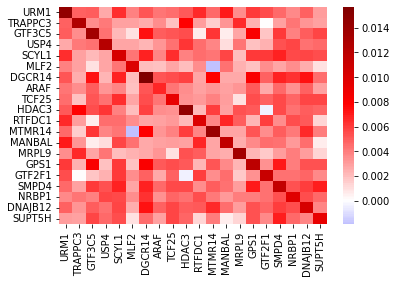

<Figure size 7200x7200 with 0 Axes>

In [62]:
labels = list(data_c.iloc[:,4:].columns)
# Determinação e especificação das legendas

sns.heatmap(np.cov(np.array(data_c.iloc[:,4:]).T), xticklabels=labels, yticklabels=labels, cmap='seismic', center=0)
# Plotagem da matriz de covariância

plt.figure(figsize=(100,100))
# Chama a biblioteca pyplot do matplotlib

pd.DataFrame(np.cov(np.array(data_c.iloc[:,4:]).T), index=labels, columns=labels)
# Responsável pela plotagem da tabela através da biblioteca Pandas

> A imagem acima retrata a matriz de covariância obtida através dos vinte genes de interesse utilizados como teste, sendo o produto da célula de código acima. A plotagem da matriz de covariância é relevante pois nos permite relacionar cada feature (gene) com as demais, sendo assim, quanto mais escuro um quadrado for em coloração, maior será a relação entre dois genes, ou seja, maior a chance de estarem "interligados", indicando que caso um gene for alterado, maiores serão as chances de sua instância conjugada se alterar também.